In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio

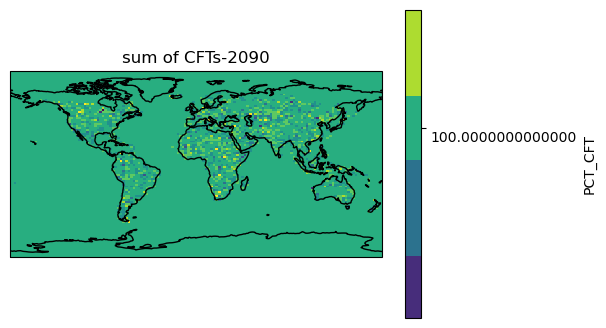

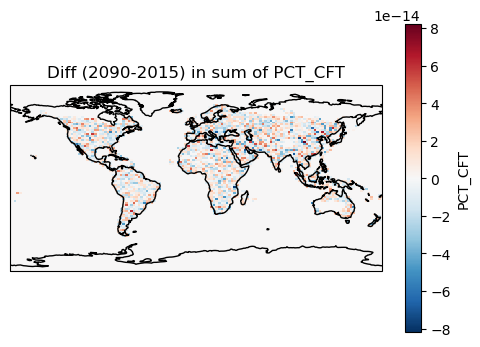

In [2]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
var = ['PCT_NAT_PFT','PCT_CFT', 'PCT_CROP']
var_area = (np.multiply((dset1[var]/100), dset1['AREA'])) # converting to area 

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#dset1.sel(time=2015)['PCT_CFT'].sum('cft').plot()
#sumvar= dset1['PCT_CROP'].sel(time=2015)+ (dset1['PCT_NAT_PFT'].sel(time=2015).sum('natpft'))
dset1['PCT_CFT'].sel(time=2090).sum('cft').plot()
plt.title('sum of CFTs-2090')
axs.coastlines(linewidth=1)

#plt.close()

#diff = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015)) 
#diff = (dset1['PCT_NAT_PFT'].sum('natpft').sel(time=2090))-(dset1['PCT_NAT_PFT'].sum('natpft').sel(time=2015)) 
#diff = (var_area['PCT_CFT'].sum('cft').sel(time=2090))-(var_area['PCT_CFT'].sum('cft').sel(time=2015)) 
diff_CFT = (dset1['PCT_CFT'].sel(time=2090))-(dset1['PCT_CFT'].sel(time=2015))
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(diff_CFT.sum('cft')).plot()
plt.title('Diff (2090-2015) in sum of PCT_CFT')
axs.coastlines(linewidth=1)

In [5]:
diff = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015))
diff.sum()

dset1['PCT_CROP'].sel(time=2090).sum()
dset1['PCT_CROP'].sel(time=2015).sum()
sum_var_above_zero = np.sum(diff.where(diff < 0))
#sum_var_above_zero
dset1.sel(time=2015)['PCT_CROP']+dset1.sel(time=2015)['PCT_NAT_PFT']
dset1['PCT_CFT'].sel(time=2090).sum('cft')
a=dset1['PCT_CFT'].sum('cft').sel(time=2090)
b=dset1['PCT_CFT'].sum('cft').sel(time=2015)
(a-b).sum()

<xarray.DataArray 'PCT_CFT' ()>
array(-1.15107923e-12)

Plots from Surface data

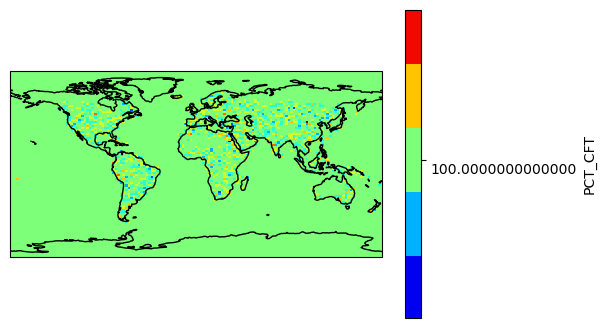

In [48]:
file2 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304.nc'     #SSP534
dset2 = xr.open_dataset(file2, decode_times=False)
dset2 = dset2.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset2=dset2.assign_coords(Latitude=dset2['LATIXY'][:,0].values)
dset2=dset2.assign_coords(Longitude=dset2['LONGXY'][0,:].values)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset2.LANDFRAC_PFT.plot()
axs.coastlines(linewidth=1)
plt.close()
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset2['PCT_CFT'].isel(cft=56)).plot()
axs.coastlines(linewidth=1)
plt.close()
#dset2['PCT_CFT'][dict(cft=56)] =  xr.where(diff > 0, diff,  dset2['PCT_CFT'][dict(cft=56)])
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset2['PCT_CFT'].sum('cft').plot(cmap='jet') 
axs.coastlines(linewidth=1)
#plt.close()


#crop_area_surf=dset2['PCT_CROP']* dset2['AREA']
#natveg_area_surf=dset2['PCT_NATVEG']*dset2['AREA']

#dset2['PCT_CFT'][dict(cft=56)] = dset2['PCT_CFT'].isel(cft=52)
#dset2['PCT_CFT'][dict(cft=52)] = 0
#dset2.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c232604.nc', encoding={'PCT_CFT': {'dtype': 'float64'}})



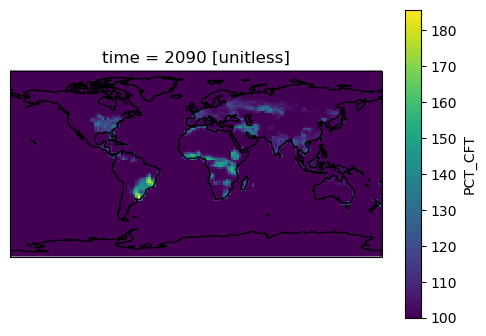

In [14]:
file2 = '/cluster/projects/nn9576k/anusha/DATA/landuse.tseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr2090_c25042023_allvar.nc'
dset2 = xr.open_dataset(file2, decode_times=False)
dset2 = xr.open_dataset(file2, decode_times=False)
dset2 = dset2.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset2=dset2.assign_coords(Latitude=dset2['LATIXY'][:,0].values)
dset2=dset2.assign_coords(Longitude=dset2['LONGXY'][0,:].values)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset2['PCT_CFT'].sum('cft').plot() 
axs.coastlines(linewidth=1)

In [3]:
file1  = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'           # file modifies with biocrops
dset1 = xr.open_dataset(file1, decode_times=False)
surfdat_2000= '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304.nc'
dset_surf2000 = xr.open_dataset(surfdat_2000, decode_times=False)
#diff = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015)) 
dset_surf2000['PCT_CFT'][dict(cft=56)]=  xr.where(diff > 0, diff,  dset_surf2000['PCT_CFT'][dict(cft=56)])





#dset_surf2000.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2090_c230404.nc')
#dset_surf2000.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2090_c230404.nc', encoding={var_name: {'dtype': 'float64'} for var_name in dset_surf2000.variables})


NameError: name 'diff' is not defined

In [46]:
#"dset_surf2000.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2090_c230404.nc', encoding={var_name: {'dtype': 'float64'} for var_name in dset_surf2000.variables})


Calculate the crop area increase in 2090 wrt 2015 and put miscanthus in the increased area in 2090

In [7]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)

diff_CFT = (dset1['PCT_CFT'].sum('cft').sel(time=2090))-(dset1['PCT_CFT'].sum('cft').sel(time=2015)) 
diff_CROP = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015)) 
biocroparea = diff_CROP - diff_CFT #np.where((diff_CROP > 0) & (diff_CFT > 0), diff_CROP - diff_CFT, 0)

#biocroparea = diff_CROP-diff_CFT
year_data = dset1.sel(time=2015)

year_data['PCT_CFT'][dict(cft=56)] =  xr.where(biocroparea > 0, biocroparea,  year_data['PCT_CFT'][dict(cft=56)])

#year_data_2015 = dset1.sel(time=2015)
#year_data.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr2090_c24042023.nc', encoding={var_name: {'dtype': 'float64'} for var_name in dset_surf2000.variables})

change the index value of sugarcane (rainfed ) to miscanthus in the year 2090 and use that PCT_CFT distribution in surface data simyr2000

In [52]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
year_data_2090 = dset1.sel(time=2090)

year_data_2090['PCT_CFT'][dict(cft=56)] = year_data_2090['PCT_CFT'].isel(cft=52)
year_data_2090['PCT_CFT'][dict(cft=52)] = 0
#year_data_2090.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr2090_c26042023.nc', encoding={'PCT_CFT': {'dtype': 'float64'}})


file2 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304.nc'     #SSP534
dset2 = xr.open_dataset(file2, decode_times=False)
dset2 = dset2.assign(PCT_CFT=year_data_2090['PCT_CFT'])
#dset2.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c26042023.nc', encoding={'PCT_CFT': {'dtype': 'float64'}})

In [54]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset2['PCT_CFT'].isel(cft=52)).plot()
axs.coastlines(linewidth=1)
plt.close()
dset2['PCT_CFT'].isel(cft=56).sum()

var = ['PCT_NAT_PFT','PCT_CFT', 'PCT_CROP']
var_area = (np.multiply((dset2[var]/100), dset2['AREA']))
var_area['PCT_CFT'].isel(cft=56).sum()



<xarray.DataArray 'PCT_CFT' ()>
array(2.24759972e+11)
Coordinates:
    cft      int32 71

In [27]:
year_data_2090
#year_data_2090['PCT_CFT'].isel(cft=52).sum()

<xarray.Dataset>
Dimensions:                  (natpft: 15, cft: 64, Latitude: 96, Longitude: 144)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
    time                     int32 2090
  * Latitude                 (Latitude) float64 -90.0 -88.11 ... 88.11 90.0
  * Longitude                (Longitude) float64 0.0 2.5 5.0 ... 355.0 357.5
Data variables: (12/22)
    LANDFRAC_PFT             (Latitude, Longitude) float64 ...
    PFTDATA_MASK             (Latitude, Longitude) int32 ...
    PCT_CROP                 (Latitude, Longitude) float64 ...
    PCT_CROP_MAX             (Latitude, Longitude) float64 ...
    PCT_NAT_PFT              (natpft, Latitude, Longitude) float64 ...
    PCT_NAT_PFT_MAX          (natpft, Latitude, Longitude) float64 ...
    ...                       ...
    HARVEST_SH2              (Latitude, Longitude) float64 ...
    HARVEST_SH3              (Latitude, Longitude) float64 ...
    GRAZING                  (Latitude, Longitude) float64 ...
    FERTNITRO_CFT            (cft, Latitude, Longitude) float64 ...
    UNREPRESENTED_PFT_LULCC  (natpft, Latitude, Longitude) float64 ...
    UNREPRESENTED_CFT_LULCC  (cft, Latitude, Longitude) float64 ...
Attributes: (12/41)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-28-19 14:03:18
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_agfirepkmon_file:                 map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_gdp_file:                         map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_peatland_file:                    map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_soildepth_file:                   map_5x5min_ORNL-Soil_to_1.9x2.5_nom...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...

In [11]:
#year_data_2090['PCT_CFT'] = year_data_2090['PCT_CFT'].where(year_data_2090['PCT_CFT'].cft != 52, np.nan)
year_data_2090['PCT_CFT'] = year_data_2090['PCT_CFT'].where(year_data_2090['PCT_CFT'].cft != 56, values_to_move)
year_data_2090['PCT_CFT'].isel(cft=52).sum()

<xarray.DataArray 'PCT_CFT' ()>
array(44061.96488364)
Coordinates:
    cft      int32 67
    time     int32 2090

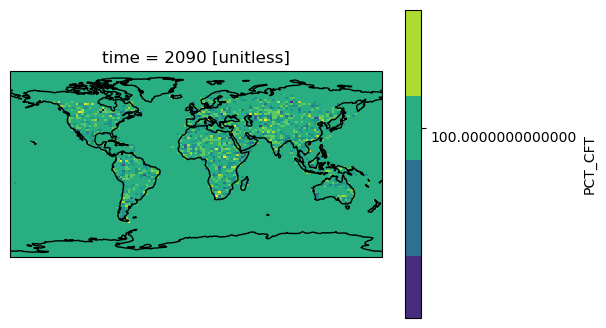

In [25]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
year_data_2090['PCT_CFT'].sum('cft').plot()
axs.coastlines(linewidth=1)

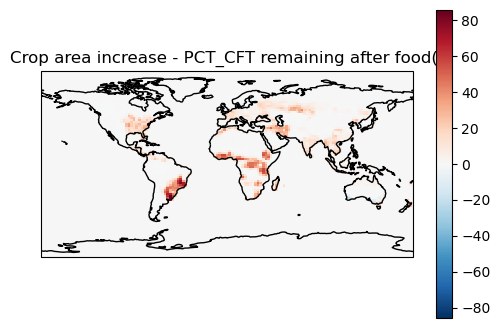

In [183]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(dset1['PCT_CFT'].sum('cft').sel(time=2015)).plot()
biocroparea.plot()
plt.title('Crop area increase - PCT_CFT remaining after food')
diff_CFT = (dset1['PCT_CFT'].sum('cft').sel(time=2090))-(dset1['PCT_CFT'].sum('cft').sel(time=2015)) 
#year_data['PCT_CFT'][dict(cft=56)].plot()
axs.coastlines(linewidth=1)

In [184]:
dset1

<xarray.Dataset>
Dimensions:                  (natpft: 15, cft: 64, Latitude: 96,
                              Longitude: 144, time: 251)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1850 1851 1852 1853 ... 2098 2099 2100
  * Latitude                 (Latitude) float64 -90.0 -88.11 ... 88.11 90.0
  * Longitude                (Longitude) float64 0.0 2.5 5.0 ... 355.0 357.5
Data variables: (12/22)
    LANDFRAC_PFT             (Latitude, Longitude) float64 ...
    PFTDATA_MASK             (Latitude, Longitude) int32 ...
    PCT_CROP                 (time, Latitude, Longitude) float64 ...
    PCT_CROP_MAX             (Latitude, Longitude) float64 ...
    PCT_NAT_PFT              (time, natpft, Latitude, Longitude) float64 ...
    PCT_NAT_PFT_MAX          (natpft, Latitude, Longitude) float64 ...
    ...                       ...
    HARVEST_SH2              (time, Latitude, Longitude) float64 ...
    HARVEST_SH3              (time, Latitude, Longitude) float64 ...
    GRAZING                  (time, Latitude, Longitude) float64 ...
    FERTNITRO_CFT            (time, cft, Latitude, Longitude) float64 ...
    UNREPRESENTED_PFT_LULCC  (time, natpft, Latitude, Longitude) float64 ...
    UNREPRESENTED_CFT_LULCC  (time, cft, Latitude, Longitude) float64 ...
Attributes: (12/41)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-28-19 14:03:18
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_agfirepkmon_file:                 map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_gdp_file:                         map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_peatland_file:                    map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_soildepth_file:                   map_5x5min_ORNL-Soil_to_1.9x2.5_nom...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...

In [152]:
dset1['PCT_CROP']

<xarray.DataArray 'PCT_CROP' (time: 251, Latitude: 96, Longitude: 144)>
[3469824 values with dtype=float64]
Coordinates:
  * time       (time) int32 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  total percent crop landunit
    units:      unitless

In [11]:
#diff.sum()
year_data.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.tseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr2090_c25042023_allvar.nc', encoding={'PCT_CFT': {'dtype': 'float64'} })

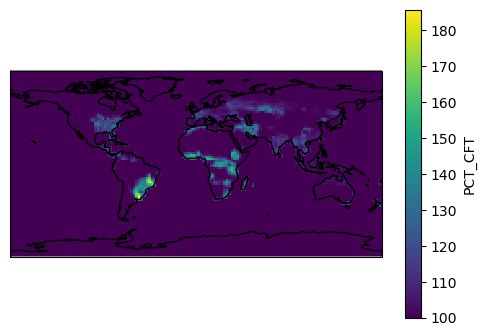

In [21]:

file_mod  = '/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c230404.nc'

dsetnew = xr.open_dataset(file_mod, decode_times=False)
dsetnew = dsetnew.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dsetnew=dsetnew.assign_coords(Latitude=dsetnew['LATIXY'][:,0].values)
dsetnew=dsetnew.assign_coords(Longitude=dsetnew['LONGXY'][0,:].values)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dsetnew['PCT_CFT'].sum('cft')).plot()
axs.coastlines(linewidth=1)
#plt.close()


In [20]:
dsetnew['PCT_CFT'].sum('cft')

<xarray.DataArray 'PCT_CFT' (Latitude: 96, Longitude: 144)>
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5

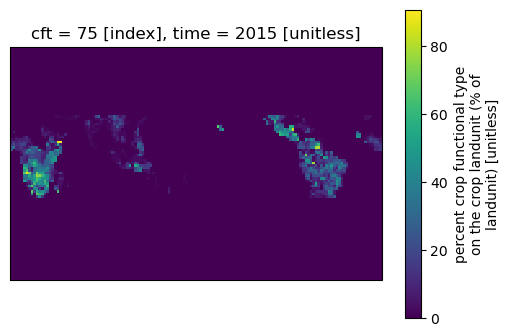

In [90]:
file = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP1-2.6_78pfts_CMIP6_simyr1850-2100_c190228.nc'
dset = xr.open_dataset(file, decode_times=False)


fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_CFT'].sel(time=2015).isel(cft=60).plot()


